# The Normal Distribution

## What we will accomplish in this notebook

In this notebook we will:
- Give informal definitions of some important concepts from probability theory:
    - Continuous random variables
    - What is means for a random variable to be normally distributed with mean $\mu$ and variance $\sigma^2$ 
    - Probability Density Function (PDF) of a continuous random variable
    - Cumulative Distribution Function (CDF) of a continuous random variable

Data science is about gaining insights from data in the face of uncertainty and variability.  

The first model we will study in this course is **linear regression**.  To specify this model we first need some basic tools for quantifying "random variability".  We will start with **normally distributed random variables**.

The Gaussian function with mean $\mu$ and variance $\sigma^2$ is defined as follows:

$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2}\right)
$$

Note that $\sigma = \sqrt{\sigma^2}$ is called the standard deviation.  It is often more convenient mathematically to work directly with $\sigma^2$ as a parameter.

The **standard Gaussian** with $\mu = 0, \sigma = 1$ is an important special case.  All Gaussians can be thought of as scaled and shifted versions of this standard Gaussian.

You can play with an interactive graph to see how the parameters $\mu$ and $\sigma^2$ impact the shape of this function [here](https://www.desmos.com/calculator/g6u3qpry7h).

<img src="lecture_3_assets/gaussian.png" width="60%"></img>

Important points:

* The maximum value is achieved at $x = \mu$.
* $f$ is symmetric about the line $x = \mu$.
* $f$ has points of inflection at $x = \pm \sigma$.
* $f$ is continuous everywhere.
* $f(x) \geq 0$ for all $x \in \mathbb{R}$.
* The integral of $f$ from $-\infty$ to $\infty$ is 1.

The last three points allow us to use this function as a **probability density function** (pdf).  What do we mean by that?

Imagine that we are conducting an experiment whose outcome could, theoretically, be any real number.  For example we might measure the weight loss of an individual after 3 months on a particular treatment.  Positive numbers would represent losses and negative numbers would represent weight gains.  Call the amount of weight lost $X$.  This is an example of a **random variable**.

In the graph of $f$ above, these outcomes would be represented by points on the horizontal axis.  If we want to calculate the probability that $X$ is between two values $a$ and $b$ we **integrate** the probability density function from $a$ to $b$:

$$
P(a < X < b) = \int_a^b f(x)\textrm{ d}x
$$

<img src="lecture_3_assets/gauss_int.png" width="60%"></img>

* Continuity of the function $f$ ensures that this integral is well defined.
* Positivity of $f$ ensures that the probability is positive.
* $P(-\infty < X < \infty) = 1$ since $f$ integrates to 1.

A few of these normal distribution integrals are so common that you should probably memorize these approximations:

* $P(\mu-\sigma < X < \mu+\sigma) \approx 0.68$
* $P(\mu-2\sigma < X < \mu+2\sigma) \approx 0.95$
* $P(\mu-3\sigma < X < \mu+3\sigma) \approx 0.997$

In words, if $X$ is normally distributed then $68\%$ of observations will be within one standard deviation of the mean, $95\%$ of observations will be within two standard deviations of the mean, and $99.7\%$ of observations will be within three standard deviations of the mean.  

Notice that these integrals are independent of the mean $\mu$ and standard deviation $\sigma$!  We will see why in just a moment.

The **cumulative distribution function** $F$ of a random variable $X$ with pdf $f$ is defined by

$$
F_X(x) = P(X < x) = \int_{-\infty}^x f(t)
$$

In the case that $X \sim \mathcal{N}(\mu,\sigma^2)$ we have

$$
\begin{align*}
F_X(x) 
&= P(X < x)\\
&= \int_{-\infty}^{t = x} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2} \frac{(t - \mu)^2}{\sigma^2}\right) \textrm{ d}t
\end{align*}
$$

Let $z = \frac{t - \mu}{\sigma}$.

$$
\int_{-\infty}^{z = \frac{x-\mu}{\sigma}} \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{z^2}{2}\right) \textrm{ d}z
$$

Notice how we have obtained a *standard normal* cdf computation after making this change of variables!  We define $z = \frac{x-\mu}{\sigma}$ as the $z$-score.  It can only be computed if $\mu$ and $\sigma^2$ are **known** quantities, which is rarely the case in practice.  We generally have **point estimates** of these parameters instead. 

Traditionally the cdf of the standard normal distribution was computed by hand using numerical algorithms to a desired precision.  These values were written down in tables.  We will use Python instead!


In [11]:
from scipy import stats as stats

# X is a standard normal random variable 
X = stats.norm(loc = 0,scale = 1)

In [14]:
# X.cdf(x) gives P(X<x).
X.cdf(1)

0.8413447460685429

QUESTION:  Before scrolling below the fold think about how you could use `X.cdf` to compute more precise values for the 68, 95, 99.7 rule we saw above.

__________


In [15]:
print(X.cdf(1) - X.cdf(-1))
print(X.cdf(2) - X.cdf(-2))
print(X.cdf(3) - X.cdf(-3))

0.6826894921370859
0.9544997361036416
0.9973002039367398


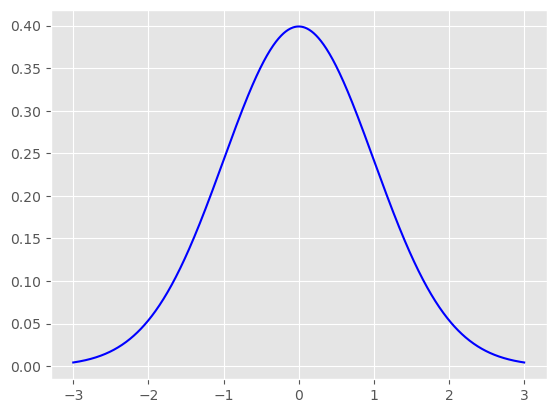

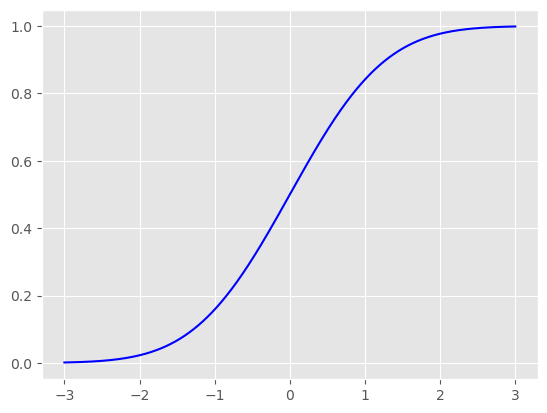

In [17]:
# Plot the standard normal pdf and cdf

import numpy as np
import matplotlib.pyplot as plt

mean = 0
std = 1

x = np.linspace(mean - 3*std, mean + 3*std,1000)
plt.plot(x,X.pdf(x),'b')

plt.show()

x = np.linspace(mean - 3*std, mean + 3*std,1000)
plt.plot(x,X.cdf(x),'b')

plt.show()

QUESTION:  Before scrolling below the fold think about how you could use Python to answer the following question.

Assume that $X$ is normally distributed with mean $5$ and standard deviation $1.3$.  What is the probability of obtaining a value greater than $7$?

-----------

Solution 1:

$P(X > 7) = 1 - P(X<7)$.  So we just need to take `1-X.cdf(7)` where `X` is normally distributed with mean $5$ and scale $1.3$.

In [24]:
X = stats.norm(loc = 5,scale = 1.3)
print(f" There is a {100*(1 - X.cdf(7)):.2f}% chance of X being larger than 7.")

 There is a 6.20% chance of X being larger than 7.


Solution 2:

We have a $z$ score of $\frac{7-5}{1.3} = \frac{2}{1.3}$.  So using the cdf of the standard normal distribution we have:

In [25]:
X = stats.norm(loc = 0,scale = 1)
print(f" There is a {100*(1 - X.cdf(2/1.3)):.2f}% chance of X being larger than 7.")

 There is a 6.20% chance of X being larger than 7.


We can draw a random sample from our distribution as follows:

In [26]:
X.rvs(size = 100)

array([ 0.26660314,  0.73451346,  0.85718515,  0.32857643, -0.53661435,
        0.05662825,  1.97859322, -0.47945765,  0.38921552, -0.43874094,
        0.8459527 ,  1.72540267,  0.11066651,  0.00677658,  0.006888  ,
       -1.13343631,  0.92682552,  0.58671107,  1.14346459,  1.04172193,
       -0.06256516,  0.74024751, -0.28242554, -1.33168817,  0.50834411,
        0.07077241, -1.08406663, -1.32771237,  0.26950917,  1.9208079 ,
       -0.20573486, -0.06412082, -1.37896858,  1.50156488, -0.85716757,
       -0.63870185,  1.22193942,  0.03381973, -1.66295855, -0.31368841,
        0.01163904,  0.08907602,  1.78185622,  0.53107069, -0.10063366,
       -0.39024784,  0.46208146, -0.20758272, -0.89228711, -0.03507063,
       -1.10405641, -1.61021377, -0.65476038,  1.03794378, -0.76260183,
       -0.43300106, -0.54511499, -0.71828837, -2.32569778, -0.66154205,
       -0.81450077, -2.27648499, -0.13959747,  0.52235379,  0.45466922,
       -0.51432741,  0.12069353, -0.05209806,  1.05925638, -1.26

In [47]:
# We can also use numpy to return samples from the standard normal distribution:

np.random.randn(4,2)

array([[ 2.26607212, -0.43308984],
       [ 2.45871851, -1.31498727],
       [ 0.72161246,  0.14176643],
       [ 1.14220776,  1.20818512]])

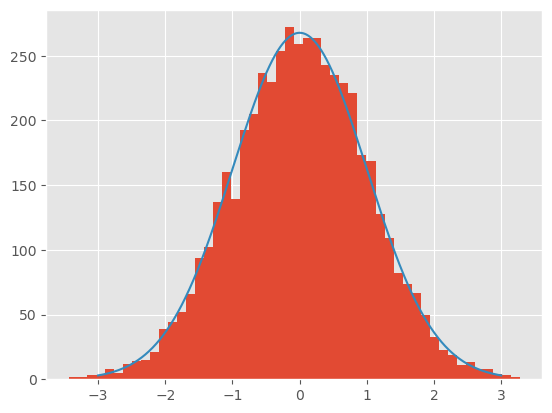

In [44]:
# A histogram helps to illustrate the connection to the pdf.

N = 5000
num_bins = 50

random_draws = X.rvs(size = N)
plt.hist(random_draws, bins=num_bins)

mean = 0
std = 1

x = np.linspace(-3,3,1000) 
bin_width = (random_draws.max() - random_draws.min()) / num_bins

# In a bin containing x the fraction of total samples should be roughly
# stats.norm.pdf(x) * bin_width
# Since there are N total samples, we should expect roughly
# stats.norm.pdf(x) * N * bin_width 
# samples in a bin containing x.
plt.plot(x, stats.norm.pdf(x) * N * bin_width)

plt.show()

### Optional practice problems for you to complete after the lecture:

In [51]:
# Define a normal random variable X with mean 10 and standard deviation 2.
X = stats.norm(loc = 10, scale = 2)

In [52]:
# Find P(|X-11| > 3)
(1 - X.cdf(14)) + X.cdf(8)

0.18140538587963628

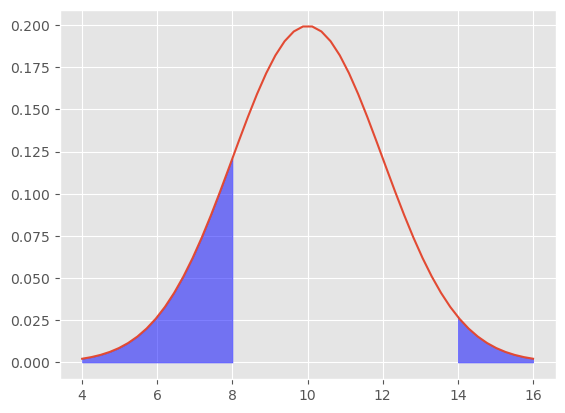

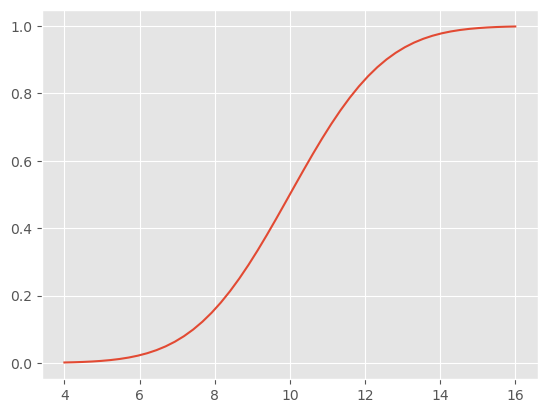

In [62]:
# Graph the pdf and cdf of $X$.  Shade the area under the pdf where |X-11| > 3.
plt.plot(np.linspace(4, 16), X.pdf(np.linspace(4, 16)))
plt.fill_between(np.linspace(14, 16),X.pdf(np.linspace(14, 16)), color = 'b', alpha = 0.5)
plt.fill_between(np.linspace(4, 8),X.pdf(np.linspace(4, 8)), color = 'b', alpha = 0.5)
plt.show()

plt.plot(np.linspace(4, 16), X.cdf(np.linspace(4, 16)))
plt.show()


In [75]:
# Draw 10000 random samples from this distribution and find what fraction of them have |X - 11| > 3.  
# Is the answer close to the probability you calculated?
random_draws = X.rvs(10000)
np.array([1*(abs(x - 11) > 3) for x in random_draws]).sum()/10000

0.1805